In [1]:
using Plots, LaTeXStrings
using LinearAlgebra

# Kitaev Chain

In [2]:
include("kitaevchain.jl")

KitaevChainMF (generic function with 1 method)

- Spectrum of Kitaev Chain

In [26]:
mus=range(-3.0,3.0,101)
spectrum = let 
    L=40
    t,Δ=1.0,1.0
    energies=[]
    for mu in mus
        spectrum=KitaevChainSpectrum(L,mu,t,Δ)
        gndenergy=sum(spectrum[spectrum[:].<=mu])
        push!(energies,gndenergy)
    end
    energies
end

101-element Vector{Any}:
 -103.30819197047943
 -101.98775300491604
 -100.67101466282624
 -102.17814829343108
 -100.82402528250726
  -99.47468937036261
  -98.13035886649983
  -96.79126380228753
  -95.45764655085895
  -94.12976246494564
  -92.80788052968755
  -91.4922840266303
  -92.4822110925701
    ⋮
  -91.4922840266303
  -92.80788052968754
  -94.12976246494561
  -95.457646550859
  -96.7912638022875
  -98.13035886649982
  -99.47468937036257
 -100.82402528250722
 -102.17814829343108
 -100.67101466282625
 -101.98775300491607
 -103.30819197047944

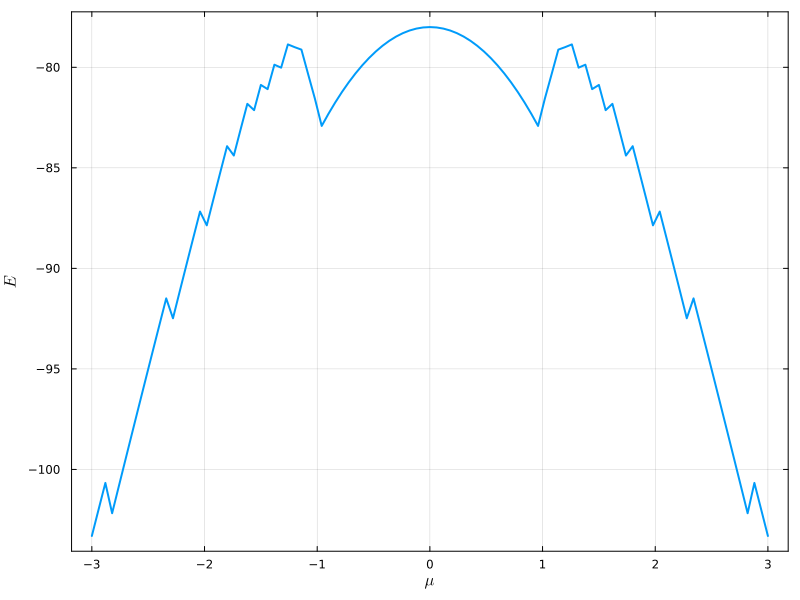

In [27]:
plot(mus,spectrum,leg=false,framestyle=:box,size=(800,600),line=2,xlabel=L"μ",ylabel=L"E")

- Ground state energy and entropy

In [37]:
energies_KC, entropies_KC=let 
    L,D=40,6
    b=Int(L/2)
    μ, t=1.0,2.0
    ts=[0.5, 1.0, 2.0]
    Δs=range(0.0,4.0,21)
    sw=Sweeps(15)
    setmaxdim!(sw,200)
    setcutoff!(sw,1E-12)
    krydim=4
    sites=siteinds("Fermion",L;conserve_qns=false)
    psi0=random_mps(sites;linkdims=D)
    energies,entropies=[],[]
    for Δ in Δs
        energy=zeros(1,6)
        entropy=zeros(1,6)
        for i in 1:3
            t=ts[i]
            Hkc=KitaevChain(sites,μ,t,Δ)
            Hkc_mf=KitaevChainMF(sites,μ,t,Δ)
            energy1,psi1=dmrg(Hkc,psi0,sw;eigsolve_krylovdim=krydim,outputlevel=0)
            energy2,psi2=dmrg(Hkc_mf,psi0,sw;eigsolve_krylovdim=krydim,outputlevel=0)
            SvN1=entangle_entropy(psi1,b)
            SvN2=entangle_entropy(psi2,b)
            energy[2*i-1:2*i]=[energy1 energy2]
            entropy[2*i-1:2*i]=[SvN1 SvN2]
        end
        push!(energies,energy)
        push!(entropies,entropy)
    end
    vcat(energies...),vcat(entropies...)
end

([-19.99999849237045 -19.999998659766575 … -51.8420851499255 -51.84208514992585; -21.141438149075576 -21.141438149075842 … -52.468583854628484 -52.468583871971425; … ; -99.89165011483122 -99.89165011483135 … -117.07396505802966 -117.07396505802969; -104.75968879584963 -104.75968879584859 … -121.514775469221 -121.51477546922082], [7.502493543575908e-7 4.79390212109571e-7 … 0.9219259273799684 0.9219259273799583; 0.4171875286653791 0.417187528665216 … 0.9329672991815798 0.9329717445094795; … ; 0.6864661265433415 0.6864661265433034 … 0.041855185177057525 0.0418551851770578; 0.691090440463596 0.6910904404635873 … 0.047210848110392764 0.04721084811039431])

In [48]:
Ds=range(0.0,4.0,21)
ts=[0.5,1.0,2.0]
labels=[["t=$(ts[i]) cf ops" "t=$(ts[i]) mf ops"] for i in 1:3]
labels=hcat(labels...)
lines=repeat([:solid :dash], 1, 3)
colors=repeat([1 2 3],inner=(1,2))
plot(Ds,energies_KC,framestyle=:box,label=labels,line=lines,color=colors,xlabel="Δ", ylabel="energy",w=2)
annotate!([(0.5, -100,(L"\mu=1.0"))])
savefig("figures/KC_gndenergy.pdf")

"/home/zephyr/Documents/quantum_computation/tensornetwork/figures/KC_gndenergy.pdf"

In [53]:
plot(Ds,entropies_KC,framestyle=:box,label=labels,line=lines,color=colors,xlabel="Δ", ylabel="entropy",w=2,leg=:top)
annotate!([(2, 0.3,(L"\mu=1.0"))])
savefig("figures/KC_gndentropy.pdf")

"/home/zephyr/Documents/quantum_computation/tensornetwork/figures/KC_gndentropy.pdf"